# Assignment 5

In this assignment we will work on the implementation of an analysis / assessment model in L2-Python. We focus again on the domain of loneliness (see description in assignment 4).

## 1. Graphical Representation (20 points)

Provide a graphical representation of a backward analysis model

***
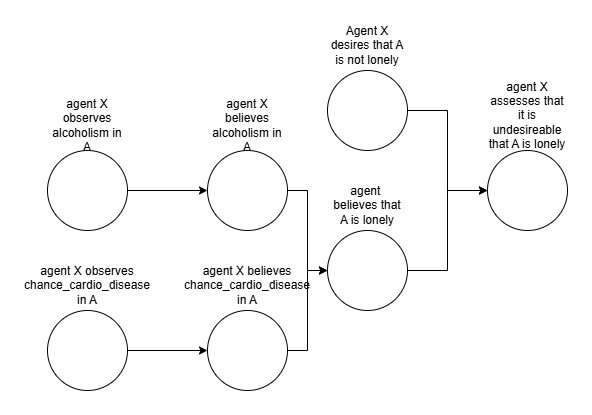
***

## 2. Semi-formal Rules (20 points)

Write out the rules of the backward analysis model in a semi-formal notation. The concept that is used to base our assessment on is <i>feeling_of_loneliness<i> and the observable concepts are <i>alcoholism_level<i> and <i>chance_cardio_disease<i>.

***
* 1

    AT EACH TIME STEP, the alcoholism level (REAL number) of agent A increases by a value of 2 (simulating increasing alcoholism over years).


* 2

    AT EACH TIME STEP, IF agent A has alcoholism level is 50 or above (alcoholism predicate value for agent A >= 50) OR IF agent A has chance of cardio disease (chance_cardio_disease = True), THEN  AT THE NEXT TIME STEP the alcoholism of agent A or the chance of cardio disease of agent A can be observed by X.


* 3

    AT EACH TIME STEP, IF X observes a state of agent A, THEN AT THE NEXT TIME STEP X believes that a state is present for agent A.


* 4

    AT EACH TIME STEP, IF X beliefs that agent A has alcoholism AND chance of cardio disease, THEN AT THE NEXT TIME STEP X believes that a state of feeling of loneliness is present for agent A.


* 5

    AT EACH TIME STEP, IF X beliefs that agent A has a feeling of loneliness, THEN AT THE NEXT TIME STEP X assesses that agent A is feeling lonely.
    
***

## 3. Implementation (40 points)

Implement a backward analysis model in L2-Python. Most rules are already provided, in the code you see what you have to add.

#### Imports
Before we write the rules, we first import the Predicate class, just as we did in assignment 3.

In [18]:
from l2 import StateMachine, INF,Predicate
state_machine = StateMachine()

#### Sorts
First, define the sorts file. Make sure you define the sorts in the same manner you did in previous assignments.

In [19]:
state_machine.sorts = {
    'AGENT': ['agent_mikolaj'],
    'BOOLEAN': ['True', 'False'],
    'PERFORMANCE': ['good', 'sufficient', 'unsufficient', 'bad'],
    'LEVEL': ['low', 'medium', 'high'],
    'REAL': []
}

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-------------+-------------------------------------+
|  Sort name  |             Sort values             |
+-------------+-------------------------------------+
|    AGENT    |            agent_mikolaj            |
|   BOOLEAN   |             True, False             |
| PERFORMANCE | good, sufficient, unsufficient, bad |
|    LEVEL    |          low, medium, high          |
|     REAL    |                                     |
+-------------+-------------------------------------+


#### Predicates
Next, define the predicates file. Make sure you define the predicates in the same manner you did in assignment 3.

In [20]:
state_machine.predicates = {
    'chance_cardio_disease': ['AGENT', 'BOOLEAN'],
    'alcoholism': ['AGENT', 'REAL'],
    'feeling_of_loneliness': ['AGENT', 'BOOLEAN'],
    'performance_at_work': ['AGENT', 'PERFORMANCE'],
    'training': ['AGENT', 'BOOLEAN'],
    'emotion_regulation_ability': ['AGENT', 'REAL'],
    'social_activities_enjoyed': ['AGENT', 'REAL'],
    'level_of_vulnerability': ['AGENT', 'LEVEL'],
    'expectation_of_others': ['AGENT', 'REAL']
}


The StateMachine contains the following predicates with their corresponding sorts: 
+----------------------------+--------------------------+
|       Predicate name       |          Sorts           |
+----------------------------+--------------------------+
|   chance_cardio_disease    |   ['AGENT', 'BOOLEAN']   |
|         alcoholism         |    ['AGENT', 'REAL']     |
|   feeling_of_loneliness    |   ['AGENT', 'BOOLEAN']   |
|    performance_at_work     | ['AGENT', 'PERFORMANCE'] |
|          training          |   ['AGENT', 'BOOLEAN']   |
| emotion_regulation_ability |    ['AGENT', 'REAL']     |
| social_activities_enjoyed  |    ['AGENT', 'REAL']     |
|   level_of_vulnerability   |    ['AGENT', 'LEVEL']    |
|   expectation_of_others    |    ['AGENT', 'REAL']     |
+----------------------------+--------------------------+


#### Scenario
Thirdly, define the scenarios file. Make sure you define the scenarios(s) in the same manner you did in previous assignments.

In [21]:
state_machine.scenario = [
    ('alcoholism', ['agent_mikolaj', 30], [0, 1]),
    ('chance_cardio_disease', ['agent_mikolaj', True], [0, INF]),
]

#### Rules
From here, you should implement a number of rules. Remember you should have one rule for every concept that has at least one arrow pointing towards it.
Make sure to take a look at the documentation first, as you will need some new functions like ```previous_state.retrieve_observations()```
https://l2-python-doc.readthedocs.io/en/latest/state/ 

## DDR1

In [22]:
def alcoholism_increase(states, t):
    previous_state = states[t - 1]
    for agent, alcoholism_value in previous_state.get_predicate("alcoholism"):
        new_alcoholism_value = alcoholism_value + 2

        updated_alcoholism = Predicate("alcoholism", [agent], new_alcoholism_value)
        states[t].add_predicate_to_state(updated_alcoholism)


## DDR2

In [23]:
def states_to_observations(states, t):
    previous_state = states[t - 1]
    for agent, alcoholism in previous_state.get_predicate("alcoholism"):
        if alcoholism >= 100:
            states[t].add_nested_predicate_to_state("observed", "alcoholism", (Predicate("alcoholism", [agent], True)))
            
    for agent, cardio_disease in previous_state.get_predicate("chance_cardio_disease"):
        if cardio_disease == True:
            cardio_disease_observation = Predicate("chance_cardio_disease", [agent], True)
            states[t].add_nested_predicate_to_state("observed", "chance_cardio_disease", cardio_disease_observation)

## DDR3

In [24]:
def observation_to_belief(states, t):
    """
        set observations to beliefs
        observed : {observations ...}
        belief : {beliefs ...}
    """
    previous_state = states[t - 1]
    observations = previous_state.retrieve_observations()
    if observations:
        for predicate in observations:
            for nested_predicates in observations[predicate]:
                agent = nested_predicates.agents
                observation = nested_predicates.value
                new_predicate = Predicate(predicate, agent, observation)
                states[t].add_nested_predicate_to_state("belief", predicate, new_predicate)
    

## DDR4

In [25]:
def belief_of_loneliness(states, t):
    previous_state = states[t - 1]
    beliefs = previous_state.retrieve_beliefs()
    
    if beliefs:
        for alcoholism_predicate in beliefs.get("alcoholism", []):
            agent = alcoholism_predicate.agents[0]
            alcoholism_belief = alcoholism_predicate.value

            cardio_belief = False
            for cardio_predicate in beliefs.get("chance_cardio_disease", []):
                if agent in cardio_predicate.agents:
                    cardio_belief = cardio_predicate.value
                    break

            # If both beliefs (alcoholism & cardiovascular disease) are True, then add "belief" state under the predicate of feeling_of_loneliness
            if alcoholism_belief and cardio_belief:
                loneliness_belief = Predicate("feeling_of_loneliness", [agent], True)
                states[t].add_nested_predicate_to_state("belief", "feeling_of_loneliness", loneliness_belief)

    
            


## DDR5

In [26]:
def assessment_of_loneliness(states, t):
    previous_state = states[t - 1]
    
    beliefs = previous_state.retrieve_beliefs()
    
    if beliefs:
        nested_loneliness = beliefs.get("feeling_of_lonelinees", [])
        for loneliness_predicate in nested_loneliness:
            agent = loneliness_predicate.agents[0]
            loneliness_belief = loneliness_predicate.value

            if loneliness_belief:
                loneliness_assessment = Predicate("feeling_of_loneliness", [agent], True)
                states[t].add_nested_predicate_to_state("assessment", "feeling_of_loneliness", loneliness_assessment)

        if len(nested_loneliness) == 0:
            loneliness_assessment = Predicate("feeling_of_loneliness", ['agent_mikolaj'], False)
            states[t].add_nested_predicate_to_state("assessment", "feeling_of_loneliness", loneliness_assessment)

        
            

    
    

    


Add all the temporal rules (not the helper functions) to the rule set below.

In [27]:
rules = [alcoholism_increase, states_to_observations, observation_to_belief, belief_of_loneliness, assessment_of_loneliness]

#### Run

First, import the StateMachine & visualization rule

In [28]:
state_machine.rules = rules

Run the simulation!

In [29]:
state_machine.run()
# Don't forget about debug mode!
state_machine.run(debug_mode=True)

The StateMachine runs in Debug mode!

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-------------+-------------------------------------+
|  Sort name  |             Sort values             |
+-------------+-------------------------------------+
|    AGENT    |            agent_mikolaj            |
|   BOOLEAN   |             True, False             |
| PERFORMANCE | good, sufficient, unsufficient, bad |
|    LEVEL    |          low, medium, high          |
|     REAL    |                                     |
+-------------+-------------------------------------+

The StateMachine contains the following predicates with their corresponding sorts: 
+----------------------------+--------------------------+
|       Predicate name       |          Sorts           |
+----------------------------+--------------------------+
|   chance_cardio_disease    |   ['AGENT', 'BOOLEAN']   |
|         alcoholism         |    ['AGENT', 'REAL']     |
|   feeling_of_lone

#### Visualize

In [30]:
from l2 import run_visualization

The following predicates will be visualized:
alcoholism
chance_cardio_disease
observed_chance_cardio_disease
belief_chance_cardio_disease
assessment_feeling_of_loneliness
observed_alcoholism
belief_alcoholism
belief_feeling_of_loneliness


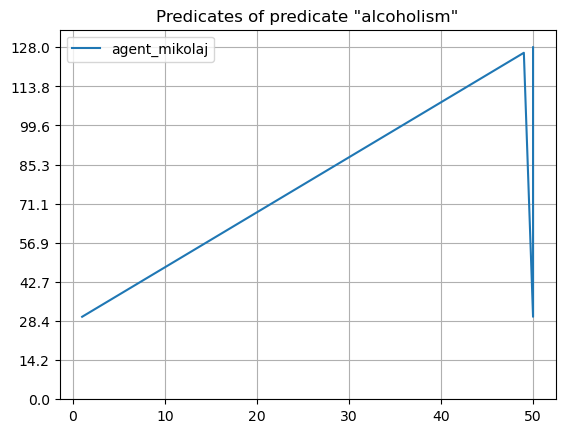

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 800x800 with 0 Axes>

In [31]:
run_visualization(state_machine)

## 4. Scenarios (20 points)
Provide two scenarios; one in which the assessment is False and one in which the assessment is True

### 1

```
Scenario 1: the start value of predixate alcoholism is 30, and the predicate chance_cardio_disease is True. The assessment of loneliness is True
```
- Alcoholism's starting value is 30, and each timestep alcoholism increases by 2, based on DDR1 (rule 1). It will surpass the threshold of 100 at the time step 36, thus in the next time step making X observe the alcoholism at agent A, by the definition of the rule.
- Chance of cardio diesease's starting value is True, because of the at the time step 1 X observes that agent A has a chance of cardio disease.
- Feeling of loneliness will be observed, if and only if both alcolism and cardio disease are believed by X for agent A. In this scenario at the time step 37 alcoholism is observed, therefore at the next time step (38) it will be believed, while chance of cardio disease will be already believed at the time step 2. Because at the time step 38 both alcoholism and chance of cardio disease are believed, at the next time step (39), the feeling of loneliness is believed. And lastly because the feeling of loneliness will be believed by X, then at the time step 40 the feeling of loneliness will be assessed.


### 2

```
Scenario 2: the start value of predicate alcoholism is 0, and the predicate chance_cardio_disease is True. The assessment of loneliness by X will be False
```

- Alcoholism's starting value is 0, and each timestep alcoholism increases by 2, based on DDR1 (rule 1). It will not surpass the threshold of 100 at any time step in the simulation (at the time step 50, the value is 98), thus X will not observe the alcoholism at agent A, and also will not believe it.
- Chance of cardio diesease's starting value is True, because of the at the time step 1 X observes that agent A has a chance of cardio disease.
- But because feeling of loneliness will be observed, if and only if both alcolism and cardio disease are believed by X for agent A. And in this scenario the alcoholism will not be observed and believed, then the assessment of loneliness will not be there by X.



In [45]:
state_machine.scenario = [
    ('alcoholism', ['agent_mikolaj', 0], [0, 1]),
    ('chance_cardio_disease', ['agent_mikolaj', True], [0, INF]),
]

state_machine.run()
state_machine.run(debug_mode=True)

The StateMachine runs in Debug mode!

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-------------+-------------------------------------+
|  Sort name  |             Sort values             |
+-------------+-------------------------------------+
|    AGENT    |            agent_mikolaj            |
|   BOOLEAN   |             True, False             |
| PERFORMANCE | good, sufficient, unsufficient, bad |
|    LEVEL    |          low, medium, high          |
|     REAL    |                                     |
+-------------+-------------------------------------+

The StateMachine contains the following predicates with their corresponding sorts: 
+----------------------------+--------------------------+
|       Predicate name       |          Sorts           |
+----------------------------+--------------------------+
|   chance_cardio_disease    |   ['AGENT', 'BOOLEAN']   |
|         alcoholism         |    ['AGENT', 'REAL']     |
|   feeling_of_lone